In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2232, '18 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['high'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.00000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.00620
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.00620
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.00130
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.00830
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.00071
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.00294
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.00332
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,-0.00061


<IPython.core.display.Javascript object>


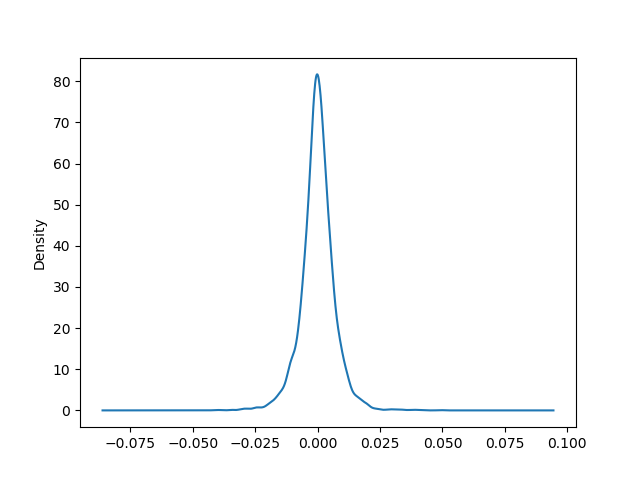

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()

In [8]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
ln=d['delta'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.00000,0.00620,0.00620,0.00130,-0.00830
1,0.00620,0.00620,0.00130,-0.00830,-0.00270
2,0.00620,0.00130,-0.00830,-0.00270,0.00360
3,0.00130,-0.00830,-0.00270,0.00360,0.00290
4,-0.00830,-0.00270,0.00360,0.00290,-0.00540
...,...,...,...,...,...
5162,-0.00362,-0.00123,-0.00045,-0.00183,0.00071
5163,-0.00123,-0.00045,-0.00183,0.00071,0.00294
5164,-0.00045,-0.00183,0.00071,0.00294,0.00332
5165,-0.00183,0.00071,0.00294,0.00332,-0.00061


In [9]:
from Bayesian import *

In [10]:
x=wn['d1']
y=wn['d2']
data = np.array([x, y])

robust_model = analyze_standard(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(500, tune=250, step=step, random_seed=21412, progressbar=False)

print(pm.summary(robust_trace))


C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [r]
>Metropolis: [sigma]
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 f

                  mean            sd      mc_error       hpd_2.5  \
sigma__0  3.335871e-04  2.355693e-04  2.354684e-05  1.000000e-04   
sigma__1  7.331109e-04  2.913887e-04  2.901876e-05  4.080756e-04   
r        -4.190977e-01  3.197566e-01  3.196226e-02 -7.417671e-01   
cov__0_0  1.667732e-07  1.612825e-07  1.610552e-08  1.000000e-08   
cov__0_1 -1.052615e-07  1.175266e-07  1.164766e-08 -4.770048e-07   
cov__1_0 -1.052615e-07  1.175266e-07  1.164766e-08 -4.770048e-07   
cov__1_1  6.223589e-07  4.090803e-07  4.075334e-08  1.665257e-07   

              hpd_97.5     n_eff       Rhat  
sigma__0  6.898462e-04  1.011401  10.867752  
sigma__1  1.000000e-03  1.120439   3.375314  
r        -9.831687e-02  1.001732  39.191123  
cov__0_0  4.758878e-07       NaN   5.933253  
cov__0_1 -9.831687e-09  1.346643   2.198124  
cov__1_0 -9.831687e-09  1.346643   2.198124  
cov__1_1  1.000000e-06       NaN   3.536480  


C:\Users\rando\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


<IPython.core.display.Javascript object>


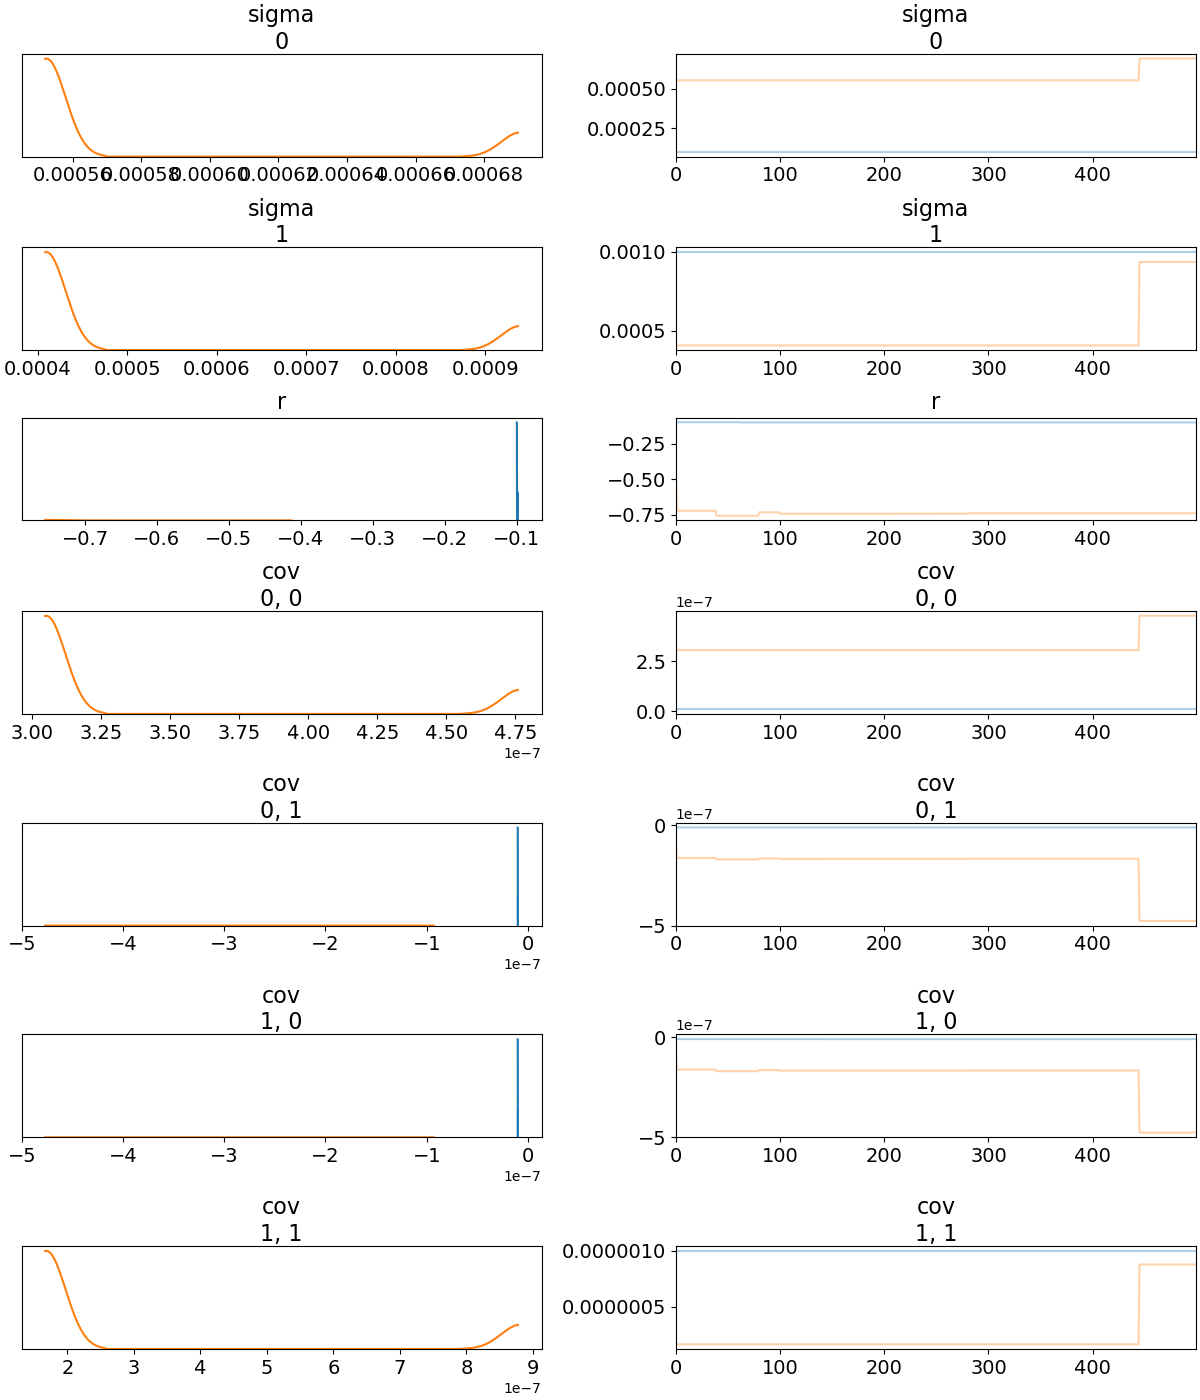

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020465748E08>,
      dtype=object)

In [11]:
pm.traceplot(robust_trace)

<IPython.core.display.Javascript object>


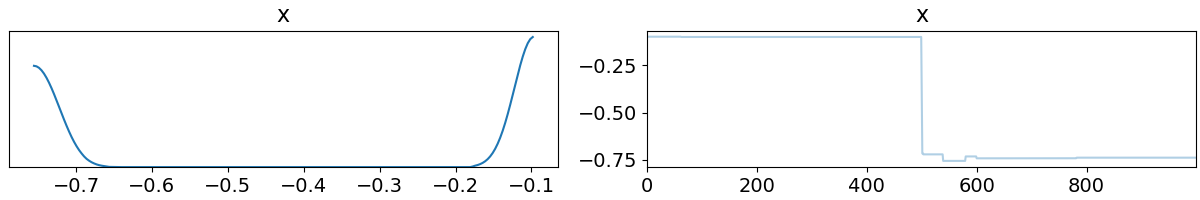

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204668C2C48>,
      dtype=object)

In [12]:
pm.traceplot(robust_trace['r'])

<IPython.core.display.Javascript object>


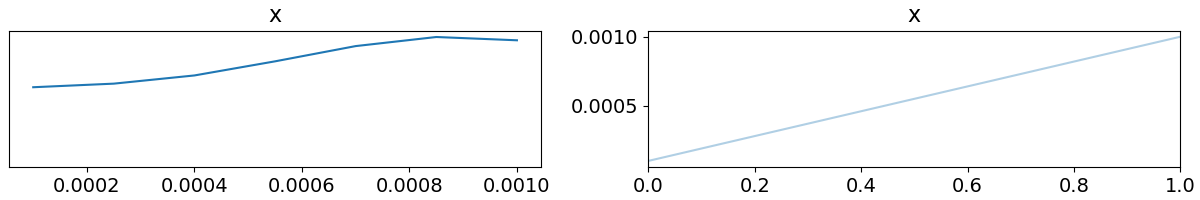

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020467A00E08>,
      dtype=object)

In [13]:
pm.traceplot(robust_trace['sigma'][499])

In [14]:
robust_model = analyze_robust(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(500, tune=250, step=step, random_seed=21412, progressbar=False)

print(pm.summary(robust_trace))

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [nu_minus_one]
>Metropolis: [r]
>Metropolis: [sigma]
>Metropolis: [mu]
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated num

                      mean            sd      mc_error       hpd_2.5  \
mu__0        -9.156447e+00  7.853217e-01  7.846423e-02 -1.025155e+01   
mu__1         9.179312e+01  7.942011e+00  7.936490e-01  8.032143e+01   
sigma__0      1.000000e-04  1.829591e-18  0.000000e+00  1.000000e-04   
sigma__1      1.000000e-03  6.505213e-19  2.168404e-20  1.000000e-03   
r            -9.980518e-01  2.009639e-03  1.963241e-04 -9.998550e-01   
cov__0_0      1.000000e-08  8.602678e-23  4.963084e-25  1.000000e-08   
cov__0_1     -9.980518e-08  2.009639e-10  1.963241e-11 -9.998550e-08   
cov__1_0     -9.980518e-08  2.009639e-10  1.963241e-11 -9.998550e-08   
cov__1_1      1.000000e-06  1.524659e-20  2.117582e-23  1.000000e-06   
nu_minus_one  1.902762e-05  1.848277e-05  1.230628e-06  8.198360e-08   
nu            1.000019e+00  1.848277e-05  1.230628e-06  1.000000e+00   

                  hpd_97.5       n_eff      Rhat  
mu__0        -8.083615e+00    1.096840  4.360282  
mu__1         1.026512e+02    1.1

C:\Users\rando\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


<IPython.core.display.Javascript object>


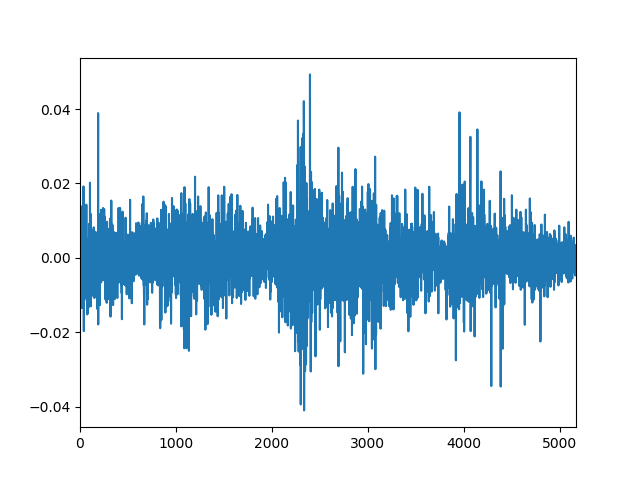

In [15]:
d['delta'].plot()

<IPython.core.display.Javascript object>


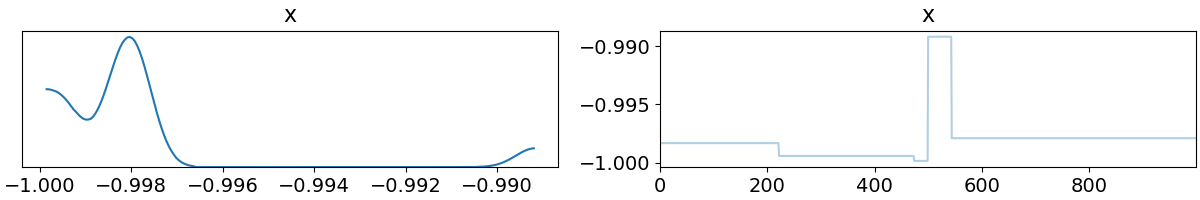

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020468D8F548>,
      dtype=object)

In [16]:
pm.traceplot(robust_trace['r'])